Highest observed lagoon stand, timing of high flows, time that water is above the levee cut for the scenarios.

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
import six

import numpy as np
from matplotlib.dates import num2date,date2num

import xarray as xr
import pandas as pd
import os

from stompy import utils
from stompy.grid import unstructured_grid, multi_ugrid
import stompy.model.data_comparison as dc

import stompy.model.delft.dflow_model as dfm
import pesca_base
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

DFM_ROOT NOT SET
local_config: LD_LIBRARY_PATH:
/share/apps/mpfr-3.1.2/lib:/share/apps/openmpi-4.0.1/gcc7/lib:/share/apps/slurm-21.08.8-2/18.04/lib
------------


In [11]:
%matplotlib notebook

In [22]:
# ESA maybe ends 2017-01-01? and was mostly/all nan in this period.

In [38]:
ls "../../data/BML data/2017/water_level/elevationNAVD88"

2017_BC1_referenced.mat             2017_NCK_referenced.mat
2017_BC1_wll_referenced_concat.csv  2017_NCK_wll_referenced_concat.csv
2017_BC3_wll_referenced_concat.csv  2017_PC3_wll_referenced_concat.csv
2017_CH2_wll_referenced_concat.csv


In [43]:
# Load BML dataset:
year=2016
bml_data_dir=f"../../data/BML data/{year}/all_concatenated"

# BC1 starts later.  All other sites okay for this period.
stns={}
for stn in ['NCK','PC3','BC3','CH2']:
    # Shift to NAVD88 adjusted data:
    fn=os.path.join(bml_data_dir,
                    '../water_level/elevationNAVD88',
                    f'{year}_{stn}_wll_referenced_concat.csv')
    df=pd.read_csv(fn)
    # UTC
    df['time']=pd.to_datetime( df[ ['year','month','day','hour','minute','second']])
    df['depth m']=df['NAVD88']
    stns[stn]=df


<IPython.core.display.Javascript object>


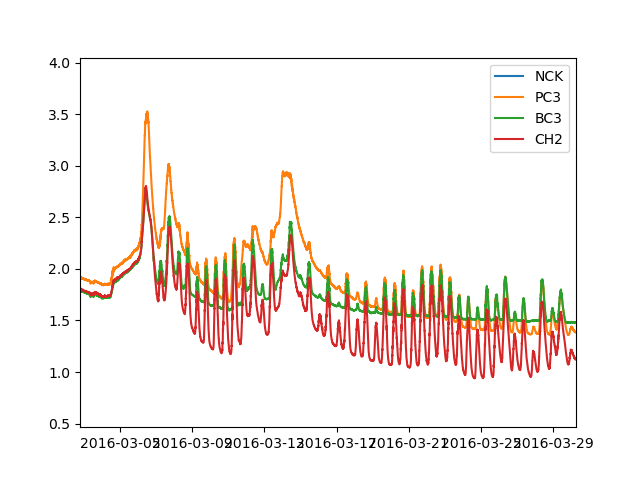

Max lagoon stand: 3.247 m


In [44]:
fig,ax=plt.subplots()
print(f"Max lagoon stand: {stns['NCK'].NAVD88.max():.3f} m")

ax.plot(stns['NCK'].time, stns['NCK'].NAVD88,label='NCK')
ax.plot(stns['PC3'].time, stns['PC3'].NAVD88,label='PC3')
ax.plot(stns['BC3'].time, stns['BC3'].NAVD88,label='BC3')
ax.plot(stns['CH2'].time, stns['CH2'].NAVD88,label='CH2')
ax.legend()

In [21]:
# Only have observed stage from NCK in the high flow portion of 2017.
ax.plot(stns['NCK'].time, stns['NCK'].NAVD88,label='NCK')

<xarray.Dataset>
Dimensions:               (time: 70129)
Coordinates:
  * time                  (time) datetime64[ns] 2009-01-01T08:00:00 ... 2017-01-01T08:00:00
Data variables:
    waterlevel_ft_navd88  (time) float64 nan nan nan nan nan ... nan nan nan nan
    waterlevel_orig       (time) float64 ...
    waterlevel            (time) float64 nan nan nan nan nan ... nan nan nan nan

In [45]:
# Load BML dataset:
ncks=[]
for year in [2016,2017]:
    bml_data_dir=f"../../data/BML data/{year}/all_concatenated"
    stn='NCK'
    fn=os.path.join(bml_data_dir,
                    '../water_level/elevationNAVD88',
                    f'{year}_{stn}_wll_referenced_concat.csv')
    df=pd.read_csv(fn)
    # UTC
    df['time']=pd.to_datetime( df[ ['year','month','day','hour','minute','second']])
    df['depth m']=df['NAVD88']
    ncks.append(df)
    
# HERE: have to relate 2016 PC3 data to flow, maybe PC3-NCK gradient?



In [6]:
# Rather than trying to get fancy with stage-flow relationships, just report
# what the baseline run predicted
import stompy.model.delft.dflow_model as dfm
import run_database
runs=run_database.all_runs
runs=runs[ 
    (runs.layers==100) 
    & (runs.period=='2016long')
    & (runs.slr==0.0)
    & (runs.scen==0)
]

mod=dfm.DFlowModel.load(runs.run_dir.values[0])

In [8]:
from common import prechain
his=mod.his_dataset(chain=True,prechain=prechain)

2 chained datasets
Trimming out extra sections from later output
Flipping variable cross_section_discharge
Flipping variable cross_section_salt
Flipping variable cross_section_cumulative_discharge
Flipping variable cross_section_velocity
Flipping variable cross_section_cumulative_salt


In [12]:
xy=np.c_[his.station_x_coordinate,
         his.station_y_coordinate]
from stompy import utils
pnt=np.r_[553154.23,4124136.96]
dists=utils.dist( xy, pnt)
sel=np.argmin(dists)

In [14]:
his.stations

<xarray.DataArray 'stations' (stations: 177)>
array(['pch_up', 'pch_down', 'lag1', 'nmc_down', 'BC3', 'ch2', 'bc1', 'nck',
       'bbr', 'bbrch', 'pc3', 'nmp', 'nmc_up', 'mid_mouth', 'mouth_thalweg',
       'npc', 'thalweg_pesc_0000', 'thalweg_pesc_0001', 'thalweg_pesc_0002',
       'thalweg_pesc_0003', 'thalweg_pesc_0004', 'thalweg_pesc_0005',
       'thalweg_pesc_0006', 'thalweg_pesc_0007', 'thalweg_pesc_0008',
       'thalweg_pesc_0009', 'thalweg_pesc_0010', 'thalweg_pesc_0011',
       'thalweg_pesc_0012', 'thalweg_pesc_0013', 'thalweg_pesc_0014',
       'thalweg_pesc_0015', 'thalweg_pesc_0016', 'thalweg_pesc_0017',
       'thalweg_pesc_0018', 'thalweg_pesc_0019', 'thalweg_pesc_0020',
       'thalweg_pesc_0021', 'thalweg_pesc_0022', 'thalweg_pesc_0023',
       'thalweg_pesc_0024', 'thalweg_pesc_0025', 'thalweg_pesc_0026',
       'thalweg_pesc_0027', 'thalweg_pesc_0028', 'thalweg_pesc_0029',
       'thalweg_pesc_0030', 'thalweg_pesc_0031', 'thalweg_pesc_0032',
       'thalweg_pesc_00

<IPython.core.display.Javascript object>


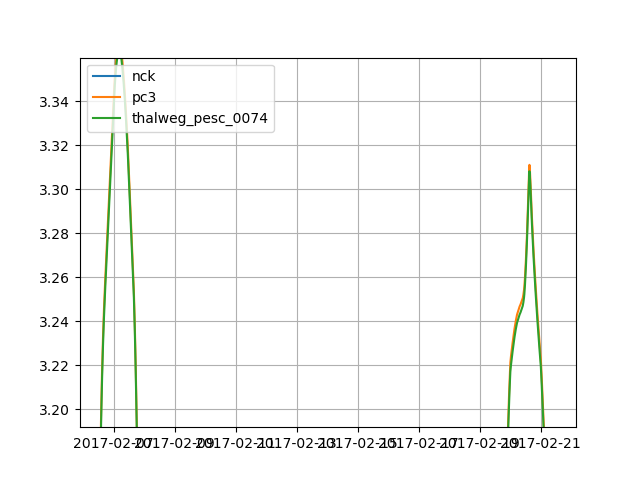

In [15]:

fig,ax=plt.subplots()

for stn in ['nck','pc3', his.stations.values[sel]]:
    ax.plot(his.time, his.waterlevel.sel(stations=stn),label=stn)
ax.legend(loc='upper left')
